The technical requirements for this project are as follows:

The dataset that we provide you is a significantly messy data set. Apply the different cleaning and manipulation techniques you have learned.
Import the data using Pandas.
Examine the data for potential issues.
Use at least 8 of the cleaning and manipulation methods you have learned on the data.
Produce a Jupyter Notebook that shows the steps you took and the code you used to clean and transform your data set.
Export a clean CSV version of your data using Pandas.

The following deliverables should be pushed to your Github repo for this chapter.

A cleaned CSV data file containing the results of your data wrangling work.
A Jupyter Notebook (data-wrangling.ipynb) containing all Python code and commands used in the importing, cleaning, manipulation, and exporting of your data set.
A README.md file containing a detailed explanation of the process followed in the importing, cleaning, manipulation, and exporting of your data as well as your results, obstacles encountered, and lessons learned.

In [1]:
import pandas as pd
import numpy as np
import re


In [2]:
df = pd.read_csv("GSAF5.csv", encoding='iso-8859-1')
df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993,NaN,NaN
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992,NaN,NaN
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991,NaN,NaN
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,...,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990,NaN,NaN
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,...,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989,NaN,NaN


In [3]:
df.shape

(5992, 24)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5992 entries, 0 to 5991
Data columns (total 24 columns):
Case Number               5992 non-null object
Date                      5992 non-null object
Year                      5992 non-null int64
Type                      5992 non-null object
Country                   5949 non-null object
Area                      5590 non-null object
Location                  5496 non-null object
Activity                  5465 non-null object
Name                      5792 non-null object
Sex                       5425 non-null object
Age                       3311 non-null object
Injury                    5965 non-null object
Fatal (Y/N)               5973 non-null object
Time                      2779 non-null object
Species                   3058 non-null object
Investigator or Source    5977 non-null object
pdf                       5992 non-null object
href formula              5991 non-null object
href                      5989 non-null object
C

In [5]:
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

### Deletion of redundant columns

In [6]:
compare = np.where((df['Case Number'] == df['Case Number.1']),True,False) #para cada valor compara si es igual o no

np.count_nonzero(compare) # --> cuenta valores iguales

5979

In [7]:
compare = np.where((df['Case Number'] == df['Case Number.2']),True,False) #para cada valor compara si es igual o no

np.count_nonzero(compare) # --> cuenta valores iguales

5990

In [8]:
df = df.drop(['Case Number.1', 'Case Number.2'], axis=1)

In [9]:
df['Unnamed: 22'].value_counts()

stopped here    1
Name: Unnamed: 22, dtype: int64

In [10]:
df['Unnamed: 23'].value_counts()

Teramo             1
change filename    1
Name: Unnamed: 23, dtype: int64

In [11]:
#cols Unnamed: 22 y Unnamed: 23 no aportan info, las elimino

df = df.drop(['Unnamed: 22', 'Unnamed: 23'], axis=1)

In [12]:
df['original order'].value_counts()

5661    2
569     2
3847    2
5739    2
2047    1
2716    1
4755    1
2708    1
661     1
4759    1
2712    1
665     1
4763    1
4767    1
669     1
2704    1
2720    1
673     1
4771    1
2724    1
677     1
4775    1
2728    1
657     1
4751    1
4779    1
4735    1
4723    1
2676    1
629     1
       ..
5456    1
1362    1
3411    1
5460    1
1366    1
3415    1
1342    1
3387    1
3359    1
1338    1
5408    1
1314    1
3363    1
5412    1
1318    1
3367    1
5416    1
1322    1
3371    1
5420    1
1326    1
3375    1
5424    1
1330    1
3379    1
5428    1
1334    1
3383    1
5432    1
2049    1
Name: original order, Length: 5988, dtype: int64

In [13]:
#La columna original order no es mas que una columna de indices invertida, la elimino

df = df.drop(['original order'], axis=1)

In [14]:
df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,16,Minor injury to thigh,N,13h00,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,36,Lacerations to hands,N,11h00,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,43,Lacerations to lower leg,N,10h43,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,NaN,Struck by fin on chest & leg,N,NaN,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,NaN,No injury: Knocked off board by shark,N,NaN,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...


In [15]:
#recorto el dataframe a las columnas que me parecen mas interesantes 
#dejo fuera las columnas con demasida variabilidad de valores

data = df[['Case Number', 'Date', 'Year', 'Type', 'Country', 'Activity', 'Sex ', 'Age', 'Fatal (Y/N)']]

In [16]:
data.head()

,Case Number,Date,Year,Type,Country,Activity,Sex,Age,Fatal (Y/N)
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Surfing,M,16,N
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Surfing,M,36,N
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Surfing,M,43,N
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Surfing,M,NaN,N
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Surfing,M,NaN,N


### Converting column names to snake case format

In [17]:

col_names = data.columns
cols = [name.lower() for name in col_names]
cols

['case number',
 'date',
 'year',
 'type',
 'country',
 'activity',
 'sex ',
 'age',
 'fatal (y/n)']

In [18]:
data.columns = cols

In [19]:
data.head()

,case number,date,year,type,country,activity,sex,age,fatal (y/n)
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Surfing,M,16,N
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Surfing,M,36,N
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Surfing,M,43,N
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Surfing,M,NaN,N
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Surfing,M,NaN,N


In [20]:
data = data.rename(columns={'case number':'case_number', 'sex ':'sex', 'fatal (y/n)':'fatal'})

In [21]:
data.head()

,case_number,date,year,type,country,activity,sex,age,fatal
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Surfing,M,16,N
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Surfing,M,36,N
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Surfing,M,43,N
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Surfing,M,NaN,N
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Surfing,M,NaN,N


### Cleaning column 'year'

In [22]:
stats = data['year'].describe().T
stats

count    5992.000000
mean     1925.204606
std       286.473712
min         0.000000
25%      1942.000000
50%      1975.000000
75%      2003.000000
max      2016.000000
Name: year, dtype: float64

In [23]:
boxplot = data.boxplot(column=['year'])
boxplot

In [24]:
stats['IQR'] = stats['75%'] - stats['25%']
stats

count    5992.000000
mean     1925.204606
std       286.473712
min         0.000000
25%      1942.000000
50%      1975.000000
75%      2003.000000
max      2016.000000
IQR        61.000000
Name: year, dtype: float64

In [25]:
#outliers: fuera del rango (25% - 1.5IQR) - (75% + 1.5IQR)

iqr = stats['IQR']
cutoff = iqr * 1.5
lower = stats['25%'] - cutoff
upper = stats['75%'] + cutoff

In [26]:
print('Lower year: ',lower)
print('Upper year: ',upper)

Lower year:  1850.5
Upper year:  2094.5


In [27]:
#filtramos datos de años posteriores a 1850
data = data.loc[(data['year']<upper)&(data['year']>lower),]

In [28]:
data.shape

(5754, 9)

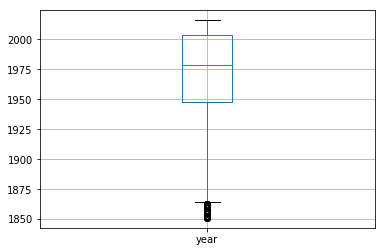

In [29]:
boxplot = data.boxplot(column=['year'])
boxplot

### Cleaning column 'age'

In [30]:
data.age.unique()

array(['16', '36', '43', nan, '60s', '51', '50', '12', '9', '22', '25',
       '37', '20', '49', '15', '21', '40', '72', '18', '29', '31', '11',
       '10', '59', '42', '34', '35', '19', '6', '27', '64', '60', '23',
       '52', '13', '57', '48', '39', '24', '26', '69', '46', 'Teen', '41',
       '45', '65', '38', '71', '32', '58', '28', '54', '44', '14', '7',
       '62', '40s', '68', '47', '17', '30', '63', '70', '18 months', '53',
       '20s', '33', '30s', '50s', '8', '61', '55', 'teen', '66', '77',
       '74', '3', '56', '28 & 26', '5', '86', '18 or 20', '12 or 13',
       '46 & 34', '28, 23 & 30', 'Teens', '36 & 26', '8 or 10', '84',
       '\xa0 ', ' ', '30 or 36', '6½', '21 & ?', '75', '33 or 37',
       'mid-30s', '73', '23 & 20', '7      &    31', '20?', "60's",
       '32 & 30', '16 to 18', '87', '67', 'Elderly', 'mid-20s', 'Ca. 33',
       '21 or 26', '>50', '18 to 22', 'adult', '9 & 12', '? & 19',
       '9 months', '25 to 35', '23 & 26', '1', '(adult)', '33 & 37',
     

In [31]:
data['age'] = pd.to_numeric(data['age'], errors='coerce') #COERCE:invalid parsing will be set as NaN

In [32]:
data.age.unique()

array([16., 36., 43., nan, 51., 50., 12.,  9., 22., 25., 37., 20., 49.,
       15., 21., 40., 72., 18., 29., 31., 11., 10., 59., 42., 34., 35.,
       19.,  6., 27., 64., 60., 23., 52., 13., 57., 48., 39., 24., 26.,
       69., 46., 41., 45., 65., 38., 71., 32., 58., 28., 54., 44., 14.,
        7., 62., 68., 47., 17., 30., 63., 70., 53., 33.,  8., 61., 55.,
       66., 77., 74.,  3., 56.,  5., 86., 84., 75., 73., 87., 67.,  1.,
       81., 78.])

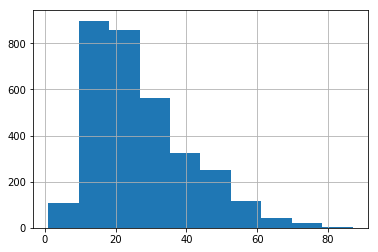

In [33]:
hist = data['age'].hist()
hist

### Cleaning column 'sex'

In [34]:
data['sex'].unique()

array(['M', nan, 'F', 'M ', 'lli', 'N', '.'], dtype=object)

In [35]:
#valores que no sea M o F pasan a nan
data.loc[data['sex'] == 'lli', 'sex'] = np.nan
data.loc[data['sex'] == 'M ', 'sex'] = np.nan
data.loc[data['sex'] == 'N', 'sex'] = np.nan
data.loc[data['sex'] == '.', 'sex'] = np.nan

In [36]:
data['sex'].unique()

array(['M', nan, 'F'], dtype=object)

In [37]:
data['sex'].value_counts()

M    4639
F     567
Name: sex, dtype: int64

### Cleaning column 'fatal'

In [38]:
data.fatal.value_counts()

N          4214
Y          1429
UNKNOWN      85
 N            8
N             1
F             1
#VALUE!       1
Name: fatal, dtype: int64

In [39]:
data.loc[data['fatal'] == ' N', 'fatal'] = 'N'
data.loc[data['fatal'] == 'N ', 'fatal'] = 'N'
data.loc[data['fatal'] == 'F', 'fatal'] = 'Y'
data['fatal'].value_counts()

N          4223
Y          1430
UNKNOWN      85
#VALUE!       1
Name: fatal, dtype: int64

In [40]:
data.loc[data['fatal'] == '#VALUE!']

,case_number,date,year,type,country,activity,sex,age,fatal
5461,1890.05.14,14-May-1890,1890,Invalid,SOUTH AFRICA,NaN,M,NaN,#VALUE!


In [41]:
#it is Fatal, so I change it for Y

data.loc[data['fatal'] == '#VALUE!', 'fatal'] = 'Y'

In [42]:
data.loc[data['fatal'] == 'UNKNOWN']
#I can't say if they are fatal or not, they remain unknown

,case_number,date,year,type,country,activity,sex,age,fatal
401,2013.09.08,08-Sep-13,2013,Unprovoked,USA,NaN,F,NaN,UNKNOWN
1047,2008.04.20.a,20-Apr-08,2008,Unprovoked,AUSTRALIA,NaN,M,NaN,UNKNOWN
1142,2007.07.00,Jul-07,2007,Invalid,SENEGAL,Murder,NaN,NaN,UNKNOWN
2025,1997.06.07,07-Jun-97,1997,Unprovoked,BRAZIL,Bathing,M,NaN,UNKNOWN
2035,1997.02.21,21-Feb-97,1997,Unprovoked,USA,NaN,M,NaN,UNKNOWN
2042,1996.12.29,29-Dec-96,1996,Unprovoked,AUSTRALIA,Surfing,M,18.0,UNKNOWN
2070,1996.07.14,14-Jul-96,1996,Unprovoked,USA,NaN,NaN,NaN,UNKNOWN
2082,1996.04.28.b,28-Apr-96,1996,Unprovoked,USA,NaN,M,NaN,UNKNOWN
2098,1996.01.14.b,14-Jan-96,1996,Unprovoked,AUSTRALIA,NaN,NaN,NaN,UNKNOWN
2103,1995.12.18,18-Dec-95,1995,Unprovoked,USA,NaN,M,NaN,UNKNOWN


In [43]:
data['fatal'].value_counts()

N          4223
Y          1431
UNKNOWN      85
Name: fatal, dtype: int64

In [44]:
#transformo Y en 1 y N en 0 para facilitar posteriores analisis
#unknown = NaN

data.loc[data['fatal'] == 'Y', 'fatal'] = 1
data.loc[data['fatal'] == 'N', 'fatal'] = 0
data.loc[data['fatal'] == 'UNKNOWN', 'fatal'] = np.nan

In [45]:
data['fatal'].value_counts()

0    4223
1    1431
Name: fatal, dtype: int64

### Cleaning column 'type'

In [46]:
data['type'].value_counts()

Unprovoked      4187
Provoked         549
Invalid          504
Sea Disaster     210
Boat             194
Boating          110
Name: type, dtype: int64

In [47]:
#being attacked after a sea disaster must be considered unprovoked
data.loc[data['type'] == 'Sea Disaster', 'type'] = 'Unprovoked'

In [48]:
data['type'].value_counts()

Unprovoked    4397
Provoked       549
Invalid        504
Boat           194
Boating        110
Name: type, dtype: int64

In [49]:
#invalid, boat, boating , Y or N: we can't say if were provoked
#replace for NaN

data.loc[(data['type'] == 'Y'), 'type'] = np.nan
data.loc[(data['type'] == 'N'), 'type'] = np.nan
data.loc[(data['type'] == 'Invalid'), 'type'] = np.nan
data.loc[(data['type'] == 'Boat'), 'type'] = np.nan
data.loc[(data['type'] == 'Boating'), 'type'] = np.nan

In [50]:
data['type'].value_counts()

Unprovoked    4397
Provoked       549
Name: type, dtype: int64

In [51]:
data['provoked'] = data['type']

In [52]:
#transformo provoked en 1 y unprovoked en 0 para facilitar posteriores analisis

data.loc[(data['type'] == 'Unprovoked'), 'provoked'] = 0
data.loc[(data['type'] == 'Provoked'), 'provoked'] = 1

In [53]:
#columna 'type' ya no me sirve

data = data.drop(['type'], axis=1)

In [54]:
data.head(25)

,case_number,date,year,country,activity,sex,age,fatal,provoked
0,2016.09.18.c,18-Sep-16,2016,USA,Surfing,M,16.0,0,0
1,2016.09.18.b,18-Sep-16,2016,USA,Surfing,M,36.0,0,0
2,2016.09.18.a,18-Sep-16,2016,USA,Surfing,M,43.0,0,0
3,2016.09.17,17-Sep-16,2016,AUSTRALIA,Surfing,M,NaN,0,0
4,2016.09.15,16-Sep-16,2016,AUSTRALIA,Surfing,M,NaN,0,0
5,2016.09.15.R,15-Sep-16,2016,AUSTRALIA,Fishing,NaN,NaN,0,NaN
6,2016.09.11,11-Sep-16,2016,USA,Wading,M,NaN,0,0
7,2016.09.07,07-Sep-16,2016,USA,Swimming,F,51.0,0,0
8,2016.09.06,06-Sep-16,2016,NEW CALEDONIA,Kite surfing,M,50.0,1,0
9,2016.09.05.b,05-Sep-16,2016,USA,Boogie boarding,F,12.0,0,0


### Cleaning column 'country'

In [55]:
data.country.unique()

array(['USA', 'AUSTRALIA', 'NEW CALEDONIA', 'REUNION', 'BAHAMAS', 'SPAIN',
       'CHINA', 'JAPAN', 'COLUMBIA', 'SOUTH AFRICA', 'EGYPT',
       'NEW ZEALAND', 'INDONESIA', 'FRENCH POLYNESIA', 'CAPE VERDE',
       'Fiji', 'BRAZIL', 'DOMINICAN REPUBLIC', 'CAYMAN ISLANDS',
       'UNITED ARAB EMIRATES', 'ARUBA', 'MOZAMBIQUE', 'THAILAND', 'FIJI',
       'PUERTO RICO', 'ITALY', 'MEXICO', 'ATLANTIC OCEAN', 'GREECE',
       'MAURITIUS', nan, 'ST. MARTIN', 'FRANCE', 'ECUADOR',
       'PAPUA NEW GUINEA', 'TRINIDAD & TOBAGO', 'KIRIBATI', 'ISRAEL',
       'DIEGO GARCIA', 'TAIWAN', 'JAMAICA', 'PALESTINIAN TERRITORIES',
       'GUAM', 'SEYCHELLES', 'BELIZE', 'PHILIPPINES', 'NIGERIA', 'TONGA',
       'SCOTLAND', 'CANADA', 'CROATIA', 'SAUDI ARABIA', 'CHILE',
       'ANTIGUA', 'KENYA', 'RUSSIA', 'TURKS & CAICOS', 'COSTA RICA',
       'UNITED KINGDOM', 'MALAYSIA', 'UNITED ARAB EMIRATES (UAE)',
       'SAMOA', 'AZORES', 'SOLOMON ISLANDS', 'SOUTH KOREA', 'MALTA',
       'VIETNAM', 'MADAGASCAR', 'PANAMA',

In [56]:
#most of them in capitals
#transform all of them to upper case

data['country'] = data['country'].str.upper()  

In [57]:
data['country'].unique()

array(['USA', 'AUSTRALIA', 'NEW CALEDONIA', 'REUNION', 'BAHAMAS', 'SPAIN',
       'CHINA', 'JAPAN', 'COLUMBIA', 'SOUTH AFRICA', 'EGYPT',
       'NEW ZEALAND', 'INDONESIA', 'FRENCH POLYNESIA', 'CAPE VERDE',
       'FIJI', 'BRAZIL', 'DOMINICAN REPUBLIC', 'CAYMAN ISLANDS',
       'UNITED ARAB EMIRATES', 'ARUBA', 'MOZAMBIQUE', 'THAILAND',
       'PUERTO RICO', 'ITALY', 'MEXICO', 'ATLANTIC OCEAN', 'GREECE',
       'MAURITIUS', nan, 'ST. MARTIN', 'FRANCE', 'ECUADOR',
       'PAPUA NEW GUINEA', 'TRINIDAD & TOBAGO', 'KIRIBATI', 'ISRAEL',
       'DIEGO GARCIA', 'TAIWAN', 'JAMAICA', 'PALESTINIAN TERRITORIES',
       'GUAM', 'SEYCHELLES', 'BELIZE', 'PHILIPPINES', 'NIGERIA', 'TONGA',
       'SCOTLAND', 'CANADA', 'CROATIA', 'SAUDI ARABIA', 'CHILE',
       'ANTIGUA', 'KENYA', 'RUSSIA', 'TURKS & CAICOS', 'COSTA RICA',
       'UNITED KINGDOM', 'MALAYSIA', 'UNITED ARAB EMIRATES (UAE)',
       'SAMOA', 'AZORES', 'SOLOMON ISLANDS', 'SOUTH KOREA', 'MALTA',
       'VIETNAM', 'MADAGASCAR', 'PANAMA', 'SOMALI

In [58]:
#seas or oceans are not countries, neither is 'N' or 'Y'
#all of them to NaN

data.loc[data['country'].str.contains("OCEAN") == True, 'country']= np.nan
data.loc[data['country'].str.contains(" SEA") == True, 'country']= np.nan
data.loc[data['country'] == 'Y', 'country']= np.nan
data.loc[data['country'] == 'N', 'country']= np.nan
data['country'].unique()

array(['USA', 'AUSTRALIA', 'NEW CALEDONIA', 'REUNION', 'BAHAMAS', 'SPAIN',
       'CHINA', 'JAPAN', 'COLUMBIA', 'SOUTH AFRICA', 'EGYPT',
       'NEW ZEALAND', 'INDONESIA', 'FRENCH POLYNESIA', 'CAPE VERDE',
       'FIJI', 'BRAZIL', 'DOMINICAN REPUBLIC', 'CAYMAN ISLANDS',
       'UNITED ARAB EMIRATES', 'ARUBA', 'MOZAMBIQUE', 'THAILAND',
       'PUERTO RICO', 'ITALY', 'MEXICO', nan, 'GREECE', 'MAURITIUS',
       'ST. MARTIN', 'FRANCE', 'ECUADOR', 'PAPUA NEW GUINEA',
       'TRINIDAD & TOBAGO', 'KIRIBATI', 'ISRAEL', 'DIEGO GARCIA',
       'TAIWAN', 'JAMAICA', 'PALESTINIAN TERRITORIES', 'GUAM',
       'SEYCHELLES', 'BELIZE', 'PHILIPPINES', 'NIGERIA', 'TONGA',
       'SCOTLAND', 'CANADA', 'CROATIA', 'SAUDI ARABIA', 'CHILE',
       'ANTIGUA', 'KENYA', 'RUSSIA', 'TURKS & CAICOS', 'COSTA RICA',
       'UNITED KINGDOM', 'MALAYSIA', 'UNITED ARAB EMIRATES (UAE)',
       'SAMOA', 'AZORES', 'SOLOMON ISLANDS', 'SOUTH KOREA', 'MALTA',
       'VIETNAM', 'MADAGASCAR', 'PANAMA', 'SOMALIA', 'NEVIS', 'CUBA

In [59]:
countries = data.groupby('country', as_index=False)['case_number'].count()
countries.sort_values(by=['case_number'], ascending=False).head(10)

,country,case_number
156,USA,2081
9,AUSTRALIA,1236
133,SOUTH AFRICA,557
113,PAPUA NEW GUINEA,129
103,NEW ZEALAND,124
17,BRAZIL,101
11,BAHAMAS,95
91,MEXICO,79
71,ITALY,67
48,FIJI,60


### Cleaning column 'activity'

In [60]:
data['activity'].unique()

array(['Surfing', 'Fishing', 'Wading', ..., 'Swimming from capsized boat',
       'Wreck of the steamship Birkenhead',
       'Vessel capsized, wading ashore carrying an oar'], dtype=object)

In [61]:
len(data['activity'].unique())

#Too many different values to work with
#we could drop this column

1431

In [62]:
data = data.drop(['activity'], axis=1)

In [63]:
data.head()

,case_number,date,year,country,sex,age,fatal,provoked
0,2016.09.18.c,18-Sep-16,2016,USA,M,16.0,0,0
1,2016.09.18.b,18-Sep-16,2016,USA,M,36.0,0,0
2,2016.09.18.a,18-Sep-16,2016,USA,M,43.0,0,0
3,2016.09.17,17-Sep-16,2016,AUSTRALIA,M,NaN,0,0
4,2016.09.15,16-Sep-16,2016,AUSTRALIA,M,NaN,0,0


### Cleaning column 'date'

In [64]:
data['season'] = data['date'].astype(str)

In [65]:
#Creo una nueva columna para separar meses en 4 estaciones

data.loc[data['season'].str.contains("Jan") == True,'season']= 'Winter'
data.loc[data['season'].str.contains("Feb") == True,'season']= 'Winter'
data.loc[data['season'].str.contains("Mar") == True,'season']= 'Winter'
data.loc[data['season'].str.contains("Apr") == True,'season']= 'Spring'
data.loc[data['season'].str.contains("May") == True,'season']= 'Spring'
data.loc[data['season'].str.contains("Jun") == True,'season']= 'Spring'
data.loc[data['season'].str.contains("Jul") == True,'season']= 'Summer'
data.loc[data['season'].str.contains("Aug") == True,'season']= 'Summer'
data.loc[data['season'].str.contains("Sep") == True,'season']= 'Summer'
data.loc[data['season'].str.contains("Oct") == True,'season']= 'Autnum'
data.loc[data['season'].str.contains("Nov") == True,'season']= 'Autnum'
data.loc[data['season'].str.contains("Dec") == True,'season']= 'Autnum'

In [66]:
data.head()

,case_number,date,year,country,sex,age,fatal,provoked,season
0,2016.09.18.c,18-Sep-16,2016,USA,M,16.0,0,0,Summer
1,2016.09.18.b,18-Sep-16,2016,USA,M,36.0,0,0,Summer
2,2016.09.18.a,18-Sep-16,2016,USA,M,43.0,0,0,Summer
3,2016.09.17,17-Sep-16,2016,AUSTRALIA,M,NaN,0,0,Summer
4,2016.09.15,16-Sep-16,2016,AUSTRALIA,M,NaN,0,0,Summer


In [67]:
data['season'].value_counts()

#Hay muchas fechas que no contenian el mes y las pasaremos a NaN en la columna season

Summer                                  1712
Winter                                  1241
Spring                                  1233
Autnum                                  1214
1957                                      11
1942                                       9
1956                                       8
1941                                       7
1950                                       7
1958                                       7
1949                                       6
1970s                                      5
1955                                       5
1959                                       5
1940                                       5
1954                                       5
1961                                       4
1876                                       4
1952                                       4
1890                                       4
1898                                       4
1960                                       4
1945      

In [68]:
data.loc[(data['season']!= 'Winter') & 
         (data['season']!= 'Spring') & 
         (data['season']!= 'Summer') & 
         (data['season']!= 'Autnum'),'season']= np.nan

In [69]:
data['season'].value_counts()

Summer    1712
Winter    1241
Spring    1233
Autnum    1214
Name: season, dtype: int64

### Dropping duplicated rows

In [71]:
#Busco filas duplicadas

dups = data[data.duplicated()]
dups

,case_number,date,year,country,sex,age,fatal,provoked,season
5091,1915.07.06.a.R,Reported 06-Jul-1915,1915,MEXICO,M,NaN,1,0,Summer


In [74]:
#Elimino fila duplicada

data = data.drop_duplicates()

In [77]:
data.head()

,case_number,date,year,country,sex,age,fatal,provoked,season
0,2016.09.18.c,18-Sep-16,2016,USA,M,16.0,0,0,Summer
1,2016.09.18.b,18-Sep-16,2016,USA,M,36.0,0,0,Summer
2,2016.09.18.a,18-Sep-16,2016,USA,M,43.0,0,0,Summer
3,2016.09.17,17-Sep-16,2016,AUSTRALIA,M,NaN,0,0,Summer
4,2016.09.15,16-Sep-16,2016,AUSTRALIA,M,NaN,0,0,Summer


### Saving clean DataFrame as .csv file

In [78]:
data.to_csv('tidy_shark_dataset.csv', index=False)